In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Сырые данные по привлечению.xlsx')

## Отчёт эффективности

In [3]:
data
#в файле добавлен был месяц

,subchannel,utm_medium,stat_date,month,campaign_id,campaign_name,utm_source,type,device_type,spent,shows,clicks,apps,approves,activations,utilizations,pv_forecast,opper_cost
0,TARGET,trg.cpc,43556,4,23843080818920754,cc_новый кабинет_ros_технологии,facebook,NaN,NaN,77121.29,325791.0,604.0,50.0,9.0,8.0,7.0,155805.0,6731.0
1,TARGET,trg.cpc,43556,4,23843120933700754,cc_новый кабинет_ros_такси_2,facebook,NaN,NaN,113.76,558.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,TARGET,trg.cpc,43556,4,23843124630540754,cc_ros_фрилансеры,facebook,NaN,NaN,50254.97,241590.0,474.0,31.0,5.0,5.0,4.0,22646.0,4340.0
3,TARGET,trg.cpc,43556,4,23843125053510754,cc_msp_фрилансеры,facebook,NaN,NaN,48712.77,148799.0,362.0,25.0,4.0,2.0,1.0,66284.0,2053.0
4,TARGET,trg.cpc,43556,4,23843145034540754,cc_msp_недвижимость,facebook,NaN,NaN,4271.90,12428.0,19.0,4.0,0.0,0.0,0.0,0.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50009,UNPAID,NaN,43646,6,.,NaN,www.gosuslugi.ru,NaN,.,NaN,NaN,NaN,3.0,0.0,0.0,0.0,0.0,32.0
50010,UNPAID,NaN,43646,6,.,NaN,www.tinkoff.ru,NaN,.,NaN,NaN,NaN,2.0,0.0,0.0,0.0,0.0,32.0
50011,UNPAID,NaN,43646,6,.,NaN,www.tinkoffinsurance.ru,NaN,.,NaN,NaN,NaN,1.0,1.0,1.0,1.0,8058.0,585.0
50012,VIDEO,vdo.cpm,43646,6,1943078862,NaN,google,NaN,mobile,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,16.0


In [4]:
data['month'].value_counts()

5    17197
4    17091
6    15726
Name: month, dtype: int64

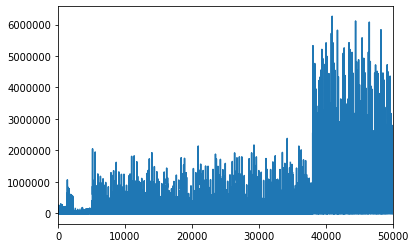

In [5]:
data['pv_forecast'].plot();

In [6]:
#колонки для анализа
colomns = ['spent', 'shows','clicks','apps','approves','activations','utilizations','pv_forecast','opper_cost']

In [7]:
#группируем колонки по месяцам и по каналам распостранения рекламы, при этом суммируя критерии

new_data = data.groupby(by=['month', 'subchannel'])[colomns].sum().astype(int)

In [8]:
new_data = new_data.rename({'spent':'бюджет', 'shows':'показы', 'clicks':'клики',
                'apps':'заявки','approves':'одобрения','activations':'активации',
                 'utilizations':'утилизация',
                'opper_cost':'операционные затраты'},axis=1)

In [9]:
# цена рекламы просто оформленной заявки 
new_data['заявки,руб'] = new_data['бюджет']/new_data['заявки']
# процент оформленных заявок относительно кликов
new_data['заявки,%'] = (new_data['заявки']/new_data['клики']*100).replace(np.inf, np.nan)

In [10]:
# цена рекламы одобренной заявки
new_data['одобрения,руб'] = new_data['бюджет']/new_data['одобрения']
# процент одобренных заявок относительно кликов
new_data['одобрения,%'] = new_data['одобрения']/new_data['заявки']*100

In [11]:
# цена рекламы активированной заявки
new_data['активации,руб'] = new_data['бюджет']/new_data['активации']
# процент активированнх заявок относительно кликов
new_data['активации,%'] = new_data['активации']/new_data['одобрения']*100

In [12]:
# цена рекламы для уже заявки эффективной загрузки
new_data['утилизация,руб'] = new_data['бюджет']/new_data['утилизация']
# процент эффективной загрузки относительно кликов
new_data['утилизация,%'] = new_data['утилизация']/new_data['активации']*100

In [13]:
new_data['заявки/утил-я,%'] = new_data['утилизация']/new_data['заявки']*100

In [14]:
# посчитаем значение ROI (return on investment)
new_data['ROI'] = ((new_data['pv_forecast']-new_data['операционные затраты']//
                   -new_data['бюджет'])/new_data['бюджет']*100).replace((np.inf)*(-1), np.nan)

In [15]:
new_data = new_data[['бюджет', 'показы', 'клики',
                     'заявки', 'заявки,руб', 'заявки,%',
                     'одобрения', 'одобрения,руб', 'одобрения,%',
                     'активации', 'активации,руб', 'активации,%',
                     'утилизация', 'утилизация,руб', 'утилизация,%', 'заявки/утил-я,%',
                     'pv_forecast', 'операционные затраты', 'ROI']]

In [16]:
#отберем более значимые заявки
new_data = new_data[new_data['заявки']>1000]

In [17]:
new_data = round(new_data,2)

In [18]:
#итоговая таблица
new_data

бюджет      показы    клики  заявки  заявки,руб  \
month subchannel                                                       
4     AFFILAT      32396824           0        0  178277      181.72   
      CONTEXT     130638031   439859282  2880559  142318      917.93   
      DISPLAY      30864768           0        0  103091      299.39   
      MAILING             0           0        0    6356        0.00   
      NATIVE              0           0        0    1114        0.00   
      OTHER I             0           0        0    1510        0.00   
      SEO                 0           0        0   19902        0.00   
      SMM                 0           0        0    1061        0.00   
      TARGET       30081275   205884105   278044   16768     1793.97   
      UNPAID              0           0        0   38751        0.00   
5     AFFILAT      28985436           0        0  151022      191.93   
      AFTERFI             0           0        0   11175        0.00   
      CONTEXT     172308326  1036887643  4492533  144218     1194.78   
      DISPLAY      14801346           0        0   50081      295.55   
      MAILING             0           0        0    5180        0.00   
      OTHER I             0           0        0    2141        0.00   
      SEO                 0           0        0   18840        0.00   
      SMM                 0           0        0    1237        0.00   
      TARGET       34859027   284553964   345008   18607     1873.44   
      UNPAID              0           0        0   40399        0.00   
6     AFFILAT      23845706           0        0  148519      160.56   
      AFTERFI             0           0        0   18951        0.00   
      CONTEXT     176853956  1169154121  4640627  154306     1146.12   
      DISPLAY       8768112           0        0   33759      259.73   
      MAILING             0           0        0    5059        0.00   
      OTHER I             0           0        0    1745        0.00   
      SEO                 0           0        0   18761        0.00   
      TARGET       34101476   258493927   341237   19104     1785.04   
      UNPAID              0           0        0   41825        0.00   

                  заявки,%  одобрения  одобрения,руб  одобрения,%  активации  \
month subchannel                                                               
4     AFFILAT          NaN      15126        2141.80         8.48       8254   
      CONTEXT         4.94      28807        4534.94        20.24      21034   
      DISPLAY          NaN      10425        2960.65        10.11       4766   
      MAILING          NaN       1616           0.00        25.42       1299   
      NATIVE           NaN        579           0.00        51.97        478   
      OTHER I          NaN        382           0.00        25.30        327   
      SEO              NaN       6040           0.00        30.35       5098   
      SMM              NaN        166           0.00        15.65        140   
      TARGET          6.03       2611       11520.98        15.57       1979   
      UNPAID           NaN       9131           0.00        23.56       8187   
5     AFFILAT          NaN      12653        2290.80         8.38       7980   
      AFTERFI          NaN       2075           0.00        18.57       1706   
      CONTEXT         3.21      30440        5660.59        21.11      22839   
      DISPLAY          NaN       5592        2646.88        11.17       2685   
      MAILING          NaN       1450           0.00        27.99       1187   
      OTHER I          NaN        550           0.00        25.69        453   
      SEO              NaN       5927           0.00        31.46       5090   
      SMM              NaN        200           0.00        16.17        172   
      TARGET          5.39       2981       11693.74        16.02       2285   
      UNPAID           NaN       8833           0.00        21.86       7933   
6     AFFILAT          NaN  

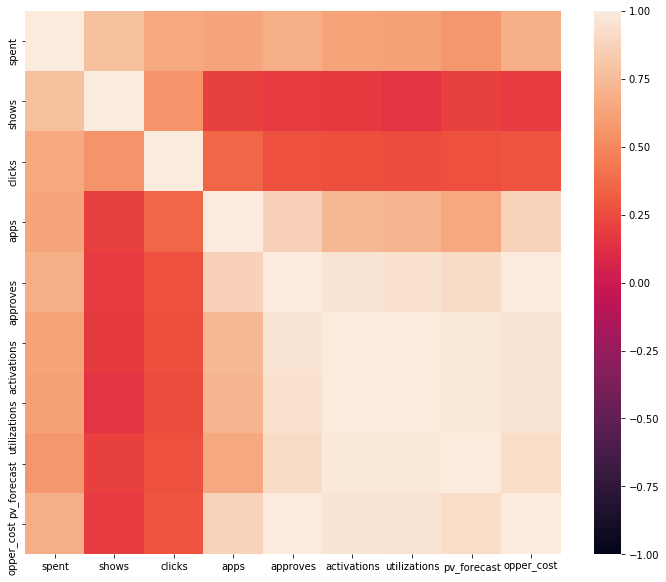

In [19]:
# корреляционный анализ 
cols = ['spent', 'shows',
       'clicks', 'apps', 'approves', 'activations', 'utilizations',
       'pv_forecast', 'opper_cost']
plt.figure(figsize=(12,10))
sns.heatmap(data[cols].corr(), vmin=-1,vmax=1);

### у approves, activations, utilizations, pv_forecast, opper_cost высокая взаимная корреляция

In [20]:
#итоговая сводная таблица
new_data
#для просмотра таблицы листать вправо

бюджет      показы    клики  заявки  заявки,руб  \
month subchannel                                                       
4     AFFILAT      32396824           0        0  178277      181.72   
      CONTEXT     130638031   439859282  2880559  142318      917.93   
      DISPLAY      30864768           0        0  103091      299.39   
      MAILING             0           0        0    6356        0.00   
      NATIVE              0           0        0    1114        0.00   
      OTHER I             0           0        0    1510        0.00   
      SEO                 0           0        0   19902        0.00   
      SMM                 0           0        0    1061        0.00   
      TARGET       30081275   205884105   278044   16768     1793.97   
      UNPAID              0           0        0   38751        0.00   
5     AFFILAT      28985436           0        0  151022      191.93   
      AFTERFI             0           0        0   11175        0.00   
      CONTEXT     172308326  1036887643  4492533  144218     1194.78   
      DISPLAY      14801346           0        0   50081      295.55   
      MAILING             0           0        0    5180        0.00   
      OTHER I             0           0        0    2141        0.00   
      SEO                 0           0        0   18840        0.00   
      SMM                 0           0        0    1237        0.00   
      TARGET       34859027   284553964   345008   18607     1873.44   
      UNPAID              0           0        0   40399        0.00   
6     AFFILAT      23845706           0        0  148519      160.56   
      AFTERFI             0           0        0   18951        0.00   
      CONTEXT     176853956  1169154121  4640627  154306     1146.12   
      DISPLAY       8768112           0        0   33759      259.73   
      MAILING             0           0        0    5059        0.00   
      OTHER I             0           0        0    1745        0.00   
      SEO                 0           0        0   18761        0.00   
      TARGET       34101476   258493927   341237   19104     1785.04   
      UNPAID              0           0        0   41825        0.00   

                  заявки,%  одобрения  одобрения,руб  одобрения,%  активации  \
month subchannel                                                               
4     AFFILAT          NaN      15126        2141.80         8.48       8254   
      CONTEXT         4.94      28807        4534.94        20.24      21034   
      DISPLAY          NaN      10425        2960.65        10.11       4766   
      MAILING          NaN       1616           0.00        25.42       1299   
      NATIVE           NaN        579           0.00        51.97        478   
      OTHER I          NaN        382           0.00        25.30        327   
      SEO              NaN       6040           0.00        30.35       5098   
      SMM              NaN        166           0.00        15.65        140   
      TARGET          6.03       2611       11520.98        15.57       1979   
      UNPAID           NaN       9131           0.00        23.56       8187   
5     AFFILAT          NaN      12653        2290.80         8.38       7980   
      AFTERFI          NaN       2075           0.00        18.57       1706   
      CONTEXT         3.21      30440        5660.59        21.11      22839   
      DISPLAY          NaN       5592        2646.88        11.17       2685   
      MAILING          NaN       1450           0.00        27.99       1187   
      OTHER I          NaN        550           0.00        25.69        453   
      SEO              NaN       5927           0.00        31.46       5090   
      SMM              NaN        200           0.00        16.17        172   
      TARGET          5.39       2981       11693.74        16.02       2285   
      UNPAID           NaN       8833           0.00        21.86       7933   
6     AFFILAT          NaN  

In [21]:
#общий итог за 3 месяца
df_new_sum = new_data.sum()
df_new_sum

бюджет                  7.185043e+08
показы                  3.394833e+09
клики                   1.297801e+07
заявки                  1.394077e+06
заявки,руб              1.010016e+04
заявки,%                2.850000e+01
одобрения               2.067500e+05
одобрения,руб           6.830117e+04
одобрения,%             5.787000e+02
активации               1.487430e+05
активации,руб           9.934205e+04
активации,%             2.202070e+03
утилизация              1.300170e+05
утилизация,руб          1.178876e+05
утилизация,%            2.531770e+03
заявки/утил-я,%         4.058100e+02
pv_forecast             2.746311e+09
операционные затраты    1.326340e+08
ROI                     3.263400e+03
dtype: float64

## Медиаплан

предложить медиаплан по продукту Тинькофф Платинум на следующий месяц с учетом сокращения бюджета на 50% от среднего за три месяца.

In [22]:
avg_spent = round(df_new_sum['бюджет']/3*0.5,2)
print('бюджет на рекламу в будущем месяце:', avg_spent)

бюджет на рекламу в будущем месяце: 119750713.83


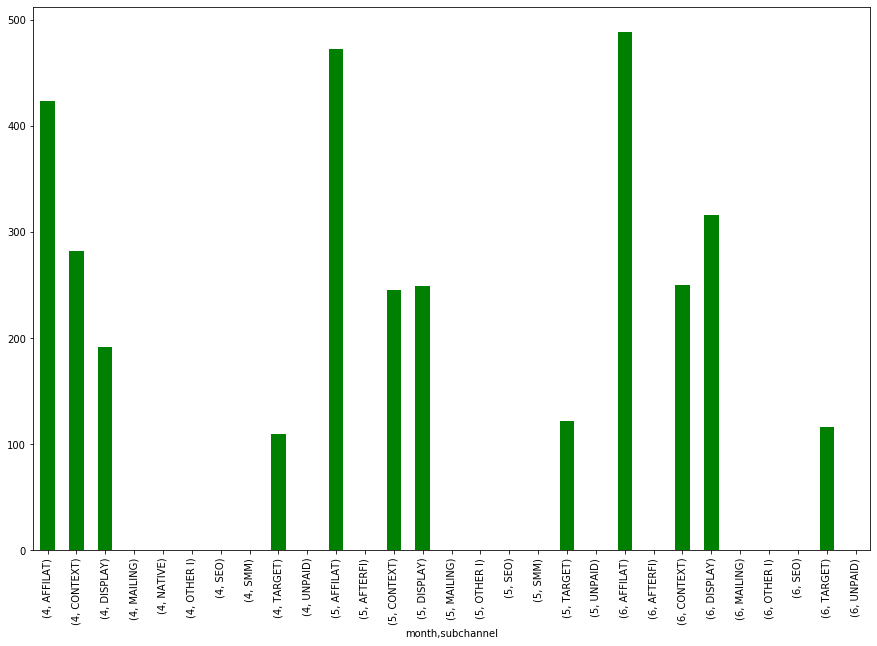

In [23]:
#проанализируем прогноз будущей выручки 
plt.figure(figsize=(15,10))
new_data['ROI'].plot(kind='bar', color='g');

### можно отметить, что во всех 3х месяцах наибольшее значение ROI  у "AFFILAT"-рекламы, а таргетированная реклама имеет меньшее значение ROI 

In [24]:
#сравним показатели ROI у "CONTEXT" и "DISPLAY"  за 3 месяца
print('CONTEXT:\n',new_data['ROI'][:,'CONTEXT'])
print('\nDISPLAY:\n',new_data['ROI'][:,'DISPLAY'])

CONTEXT:
 month
4    281.82
5    244.71
6    249.57
Name: ROI, dtype: float64

DISPLAY:
 month
4    191.88
5    248.53
6    315.57
Name: ROI, dtype: float64


In [25]:
print('для CONTEXT средняя за 3 месяца:',new_data['ROI'][:,'CONTEXT'].mean())
print('для DISPLAY средняя за 3 месяца:',round(new_data['ROI'][:,'DISPLAY'].mean()))

для CONTEXT средняя за 3 месяца: 258.7
для DISPLAY средняя за 3 месяца: 252


### средн.знач. примерно одинаковые, однако, на графике виден небольшой спад у "CONTEXT"-рекламы, а у "DISPLAY"-рекламы наоборот

## просчитаем доли ROI для каждого направления

In [26]:
avg_roi = df_new_sum['ROI']/3
print('среднее значение ROI за 3месяца для всех направлений:',avg_roi)

среднее значение ROI за 3месяца для всех направлений: 1087.8


In [27]:
print('доля ROI для AFFILAT: ', round(new_data['ROI'][:,'AFFILAT'].mean()/avg_roi*100))
print('доля ROI для CONTEXT: ', round(new_data['ROI'][:,'CONTEXT'].mean()/avg_roi*100))
print('доля ROI для DISPLAY: ', round(new_data['ROI'][:,'DISPLAY'].mean()/avg_roi*100))
print('доля ROI для TARGET:  ', round(new_data['ROI'][:,'TARGET'].mean()/avg_roi*100))

доля ROI для AFFILAT:  42.0
доля ROI для CONTEXT:  24.0
доля ROI для DISPLAY:  23.0
доля ROI для TARGET:   11.0


In [28]:
AFFILAT = avg_spent*0.42
CONTEXT = avg_spent*0.22
DISPLAY = avg_spent*0.25
TARGET = avg_spent*0.11

In [29]:
#итогавая таблица медапланирования
media = pd.DataFrame()
media['subchannel'] = ['AFFILAT', 'CONTEXT', 'DISPLAY', 'TARGET']
media['spent'] = [AFFILAT, CONTEXT, DISPLAY, TARGET]
media

,subchannel,spent
0,AFFILAT,5.029530e+07
1,CONTEXT,2.634516e+07
2,DISPLAY,2.993768e+07
3,TARGET,1.317258e+07


#### Ниже можно посмотреть на подкатегории для каждого направления рекламы, на которые стоит больше обратить внимания

In [30]:
data['ROI'] = ((data['pv_forecast']-data['opper_cost']//
                   -data['spent'])/data['spent']*100).replace((np.inf)*(-1), np.nan)

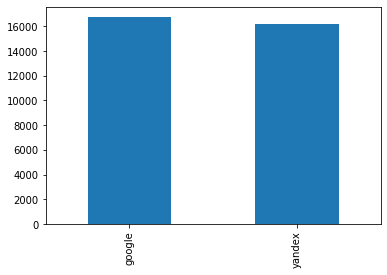

In [31]:
data[(data['subchannel']=='CONTEXT')]['utm_source'].value_counts().plot(kind='bar');

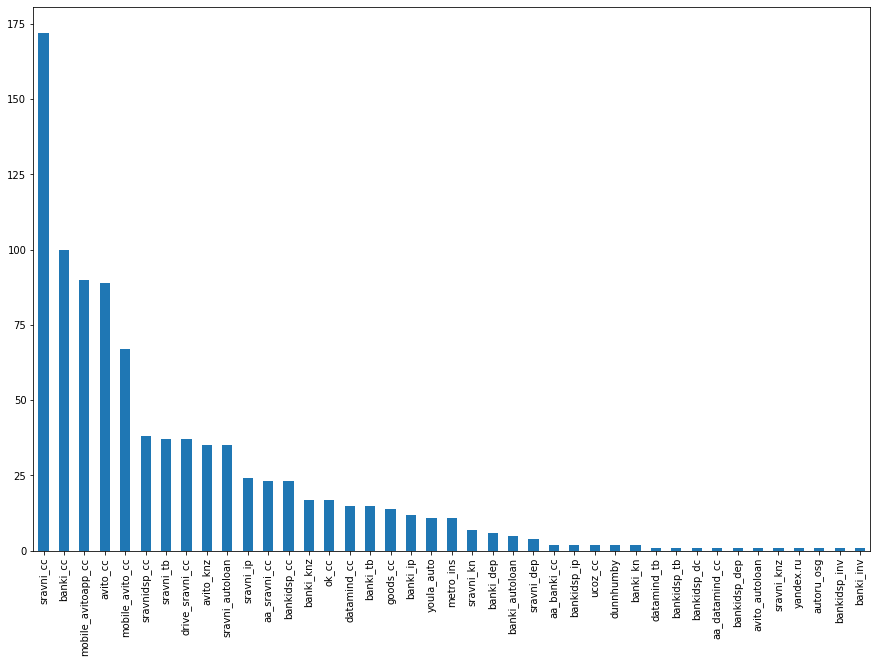

In [32]:
plt.figure(figsize=(15,10))
data[(data['subchannel']=='DISPLAY')]['utm_source'].value_counts().plot(kind='bar');

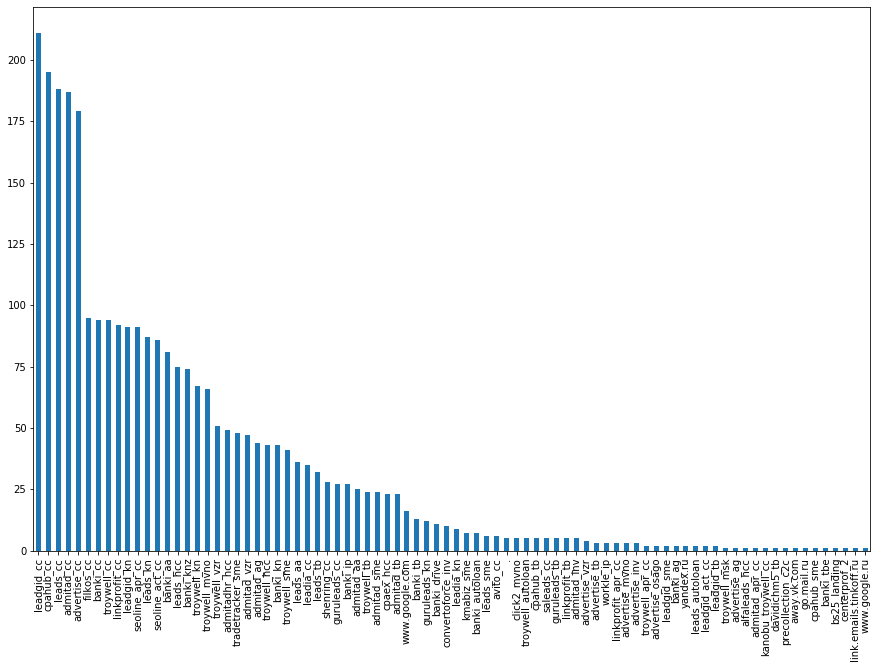

In [33]:
plt.figure(figsize=(15,10))
data[(data['subchannel']=='AFFILAT')]['utm_source'].value_counts().plot(kind='bar');

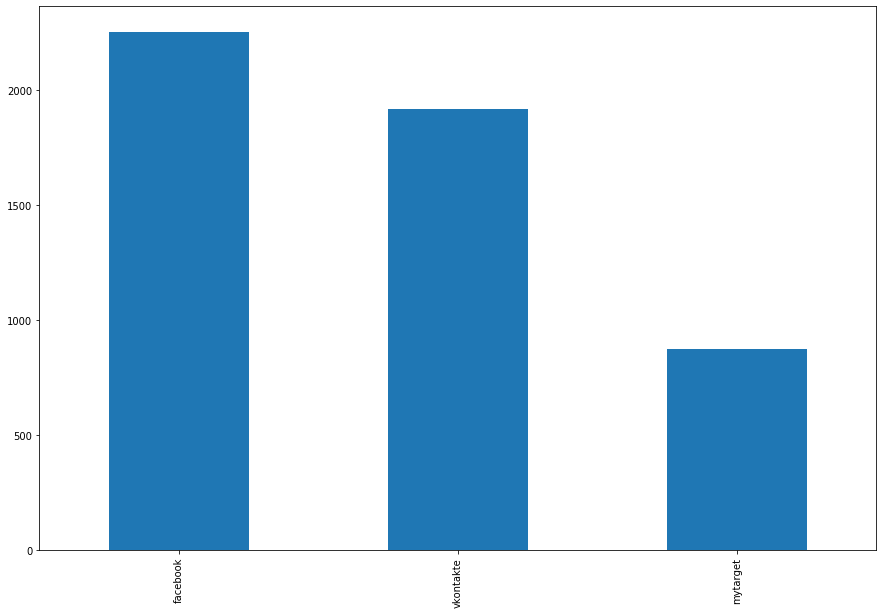

In [34]:
plt.figure(figsize=(15,10))
data[(data['subchannel']=='TARGET')]['utm_source'].value_counts().plot(kind='bar');